In [1]:
import pandas as pd 
import numpy as np 

from match import Match
from vendors.tennisabstract.historical_match_stats import HistoricalMatchStats
from models import learnloop
# from models import logit
from models.probabilities import Probabilities
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

note: both players must be top 100 for current atp scrape functionality

In [2]:
m = Match('nadal', 'ruud')

<h1 style="color:teal">player stats</h1>

scrape ytd data | warn: uneven number of matches played by surface

In [9]:
sr = m.build_serve_return_frame()

In [37]:
sr_fmt = sr.copy()
sr_unfmt = pd.DataFrame()
for c in sr_fmt.columns:
    for i in range(len(sr_fmt[c])):
        if '%' in sr_fmt[c].iloc[i]:
            sr_fmt[c].iloc[i] = int(str(sr_fmt[c].iloc[i]).replace('%',''))/100
            
    sr_fmt[c] = pd.to_numeric(sr_fmt[c])
    
    sr_unfmt[c]  = sr_fmt[c]
    sr_unfmt[c] = sr_unfmt[c][(sr_unfmt[c] > 1)] 

    sr_fmt[c] = sr_fmt[c][~(sr_fmt[c] > 1)] 

/var/folders/r4/4d5s7k716ml2ph86wpmwffvm0000gn/T/ipykernel_79012/1397777765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr_fmt[c].iloc[i] = int(str(sr_fmt[c].iloc[i]).replace('%',''))/100


In [39]:
sr_unfmt.dropna(inplace=True, axis=0)
sr_unfmt

,nadal,ruud
metric,,
Aces,28.0,139.0
Double Faults,29.0,48.0
Break Points Faced,70.0,149.0
Service Games Played,165.0,361.0
Break Points Opportunities,144.0,226.0
Return Games Played,161.0,350.0


In [13]:
sr_fmt.dropna(inplace=True, axis=0)
sr_fmt.style.bar( color='lightyellow', axis=0)

,nadal,ruud
metric,,
1st Serve,0.660000,0.660000
1st Serve Points Won,0.690000,0.730000
2nd Serve Points Won,0.570000,0.560000
Break Points Saved,0.510000,0.640000
Service Games Won,0.790000,0.850000
Total Service Points Won,0.650000,0.670000
1st Serve Return Points Won,0.390000,0.310000
2nd Serve Return Points Won,0.580000,0.520000
Break Points Converted,0.440000,0.370000


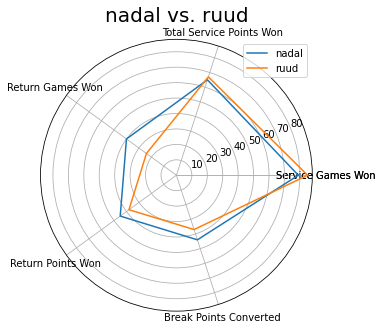

In [5]:
feats = ['Service Games Won','Total Service Points Won', 'Return Games Won', 'Return Points Won', 'Break Points Converted']
_sr = sr.copy()
for c in _sr.columns:
    _sr[c] = [int(str(x).replace('%','')) for x in _sr[c]]
    
p1 = _sr.transpose()[feats].iloc[0].values.tolist()
p2 = _sr.transpose()[feats].iloc[1].values.tolist()
p1 = [*p1, p1[0]]
p2 = [*p2, p2[0]]
feats = [*feats, feats[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(p1))

plt.figure(figsize=(8, 5))
plt.subplot(polar=True)
plt.plot(label_loc, p1, label=m.p1_lname)
plt.plot(label_loc, p2, label=m.p2_lname)
plt.title(f'{m.p1_lname} vs. {m.p2_lname}', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=feats)
plt.legend()
plt.show()

In [40]:
base_strs = ['_ytd pct', '_career pct']
p1_color_cols = [m.p1_lname + x for x in base_strs]
p2_color_cols = [m.p2_lname + x for x in base_strs]

In [41]:
x = m.build_win_loss_frame()

In [42]:
def highlight_col_labels(s):
    pass
x.style.background_gradient(subset = p1_color_cols+p2_color_cols, cmap='RdYlGn', axis=0)

,nadal_ytd pct,nadal_ytd win,nadal_ytd loss,nadal_career pct,nadal_career win,nadal_career loss,nadal_titles,ruud_ytd pct,ruud_ytd win,ruud_ytd loss,ruud_career pct,ruud_career win,ruud_career loss,ruud_titles
index,,,,,,,,,,,,,,
Overall,0.909000,30,3,0.833000,1058,212,92.000000,0.750000,30,10,0.651000,149,80,8.000000
Grand Slams,1.000000,14,0,0.882000,305,41,22.000000,0.857000,6,1,0.588000,20,14,0.000000
ATP Masters 1000,0.727000,8,3,0.825000,406,86,36.000000,0.667000,10,5,0.615000,32,20,0.000000
Tiebreaks,0.846000,11,2,0.613000,261,165,nan,0.647000,11,6,0.474000,37,41,nan
Versus Top 10,0.875000,7,1,0.649000,185,100,nan,0.333000,1,2,0.227000,5,17,nan
Finals,0.800000,4,1,0.708000,92,38,nan,0.500000,2,2,0.667000,8,4,nan
Deciding Set (3rd or 5th Set),0.778000,7,2,0.694000,179,79,nan,0.667000,6,3,0.684000,39,18,nan
5th Set Record,1.000000,3,0,0.658000,25,13,nan,1.000000,1,0,0.556000,5,4,nan
Clay,0.833000,10,2,0.913000,474,45,63.000000,0.778000,21,6,0.725000,95,36,7.000000


In [43]:
def highlight_wins(s):
    return ['background-color: green' if v == 'W' \
            else 'background-color: red' if v == 'L' \
            else '' for v in s]

p1, p2 = m.build_activity_frame()

In [44]:
print(m.p1_lname)
p1.style.background_gradient(subset = 'Rank', cmap='RdYlGn_r').apply(highlight_wins)

nadal


,Round,Rank,Opponent,W-L,Score,tournament
0,Finals,8.000000,Casper Ruud,W,63 63 60,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
1,Semi-Finals,3.000000,Alexander Zverev,W,768 66 (RET),"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
2,Quarter-Finals,1.000000,Novak Djokovic,W,62 46 62 764,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
3,Round of 16,9.000000,Felix Auger-Aliassime,W,36 63 62 36 63,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
4,Round of 32,29.000000,Botic van de Zandschulp,W,63 62 64,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
5,Round of 64,138.000000,Corentin Moutet,W,63 61 64,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
6,Round of 128,82.000000,Jordan Thompson,W,62 62 62,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
7,Round of 16,16.000000,Denis Shapovalov,L,61 57 26,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"
8,Round of 32,27.000000,John Isner,W,63 61,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"
9,Round of 64,nan,Bye,nan,nan,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"


In [45]:
print(m.p2_lname)
p2.style.background_gradient(subset = 'Rank', cmap='RdYlGn_r').apply(highlight_wins)

ruud


,Round,Rank,Opponent,W-L,Score,tournament
0,Finals,8.000000,Casper Ruud,W,63 63 60,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
1,Semi-Finals,3.000000,Alexander Zverev,W,768 66 (RET),"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
2,Quarter-Finals,1.000000,Novak Djokovic,W,62 46 62 764,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
3,Round of 16,9.000000,Felix Auger-Aliassime,W,36 63 62 36 63,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
4,Round of 32,29.000000,Botic van de Zandschulp,W,63 62 64,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
5,Round of 64,138.000000,Corentin Moutet,W,63 61 64,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
6,Round of 128,82.000000,Jordan Thompson,W,62 62 62,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
7,Round of 16,16.000000,Denis Shapovalov,L,61 57 26,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"
8,Round of 32,27.000000,John Isner,W,63 61,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"
9,Round of 64,nan,Bye,nan,nan,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"


In [46]:
'''
TODO: calculate in activity.py
        total games played and won over n period of days
        avg games played per day
        avg sets played per match
        total sets played against top opponents or higher ranked opponents
        percent of recent matches won
        average length of a set (quartiles) defined by total games played in a set
        average games conceeded per set
        distribution of wins and losses in longer (more games per set) or shorter (less) matches
'''

'\nTODO: calculate\n        total sets played and won over n period of days\n        total sets played against top opponents or higher ranked opponents\n        percent of recent matches won\n        avg sets played per day\n        average length of a set (quartiles) defined by total games played in a set\n        average games conceeded per set\n        distribution of wins and losses in longer (more games per set) or shorter (less) matches\n'

<h1 style="color:teal">predict</h1>

In [3]:
hms = HistoricalMatchStats(fname = 'atp_matches_2021.csv')

In [4]:
df = hms.player_match_rows()

In [ ]:
# TODO: calculate_match_stats in hsitorical_match_stats.py

In [8]:
df = df[[
'p1_result','p2_result',
'p1_hand', 'p1_rank','p1_ht', 'p1_ace','p1_svpt', 'p1_1stIn', 'p1_1stWon', 'p1_2ndWon', 'p1_SvGms', 'p1_bpSaved', 'p1_bpFaced', 
'p2_hand','p2_rank', 'p2_ht', 'p2_ace', 'p2_svpt', 'p2_1stIn', 'p2_1stWon', 'p2_2ndWon', 'p2_SvGms', 'p2_bpSaved', 'p2_bpFaced'
]]

In [10]:
# df.transpose()

,0,1,2,3,4,5,...,1892,1893,1894,1895,1896,1897
p1_result,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0
p2_result,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0
p1_hand,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0
p1_rank,85.0,55.0,40.0,65.0,35.0,110.0,...,194.0,177.0,250.0,150.0,381.0,176.0
p1_ht,180.0,185.0,183.0,196.0,185.0,180.0,...,193.0,185.0,193.0,185.0,185.0,185.0
p1_ace,5.0,1.0,2.0,1.0,2.0,4.0,...,9.0,5.0,11.0,6.0,7.0,2.0
p1_svpt,85.0,31.0,127.0,55.0,51.0,54.0,...,80.0,58.0,44.0,75.0,58.0,41.0
p1_1stIn,52.0,23.0,79.0,32.0,29.0,32.0,...,49.0,31.0,25.0,47.0,41.0,27.0
p1_1stWon,34.0,18.0,56.0,22.0,21.0,22.0,...,33.0,23.0,24.0,35.0,32.0,23.0
p1_2ndWon,14.0,2.0,23.0,9.0,11.0,10.0,...,15.0,15.0,13.0,16.0,11.0,7.0


mask statisticaly insignificant correlation (p > 0.05)

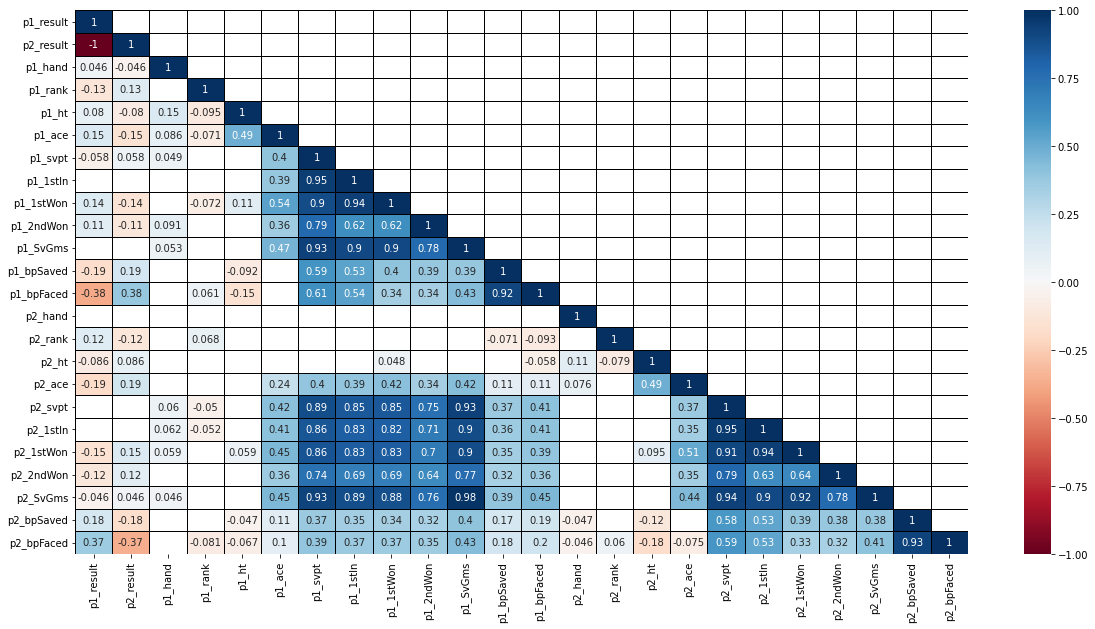

In [85]:
from scipy import stats

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='RdBu', linewidths=1, linecolor='black')
    
# Plotting with significance filter
corr = df.corr()                            # get correlation
p_values = corr_sig(df)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)  

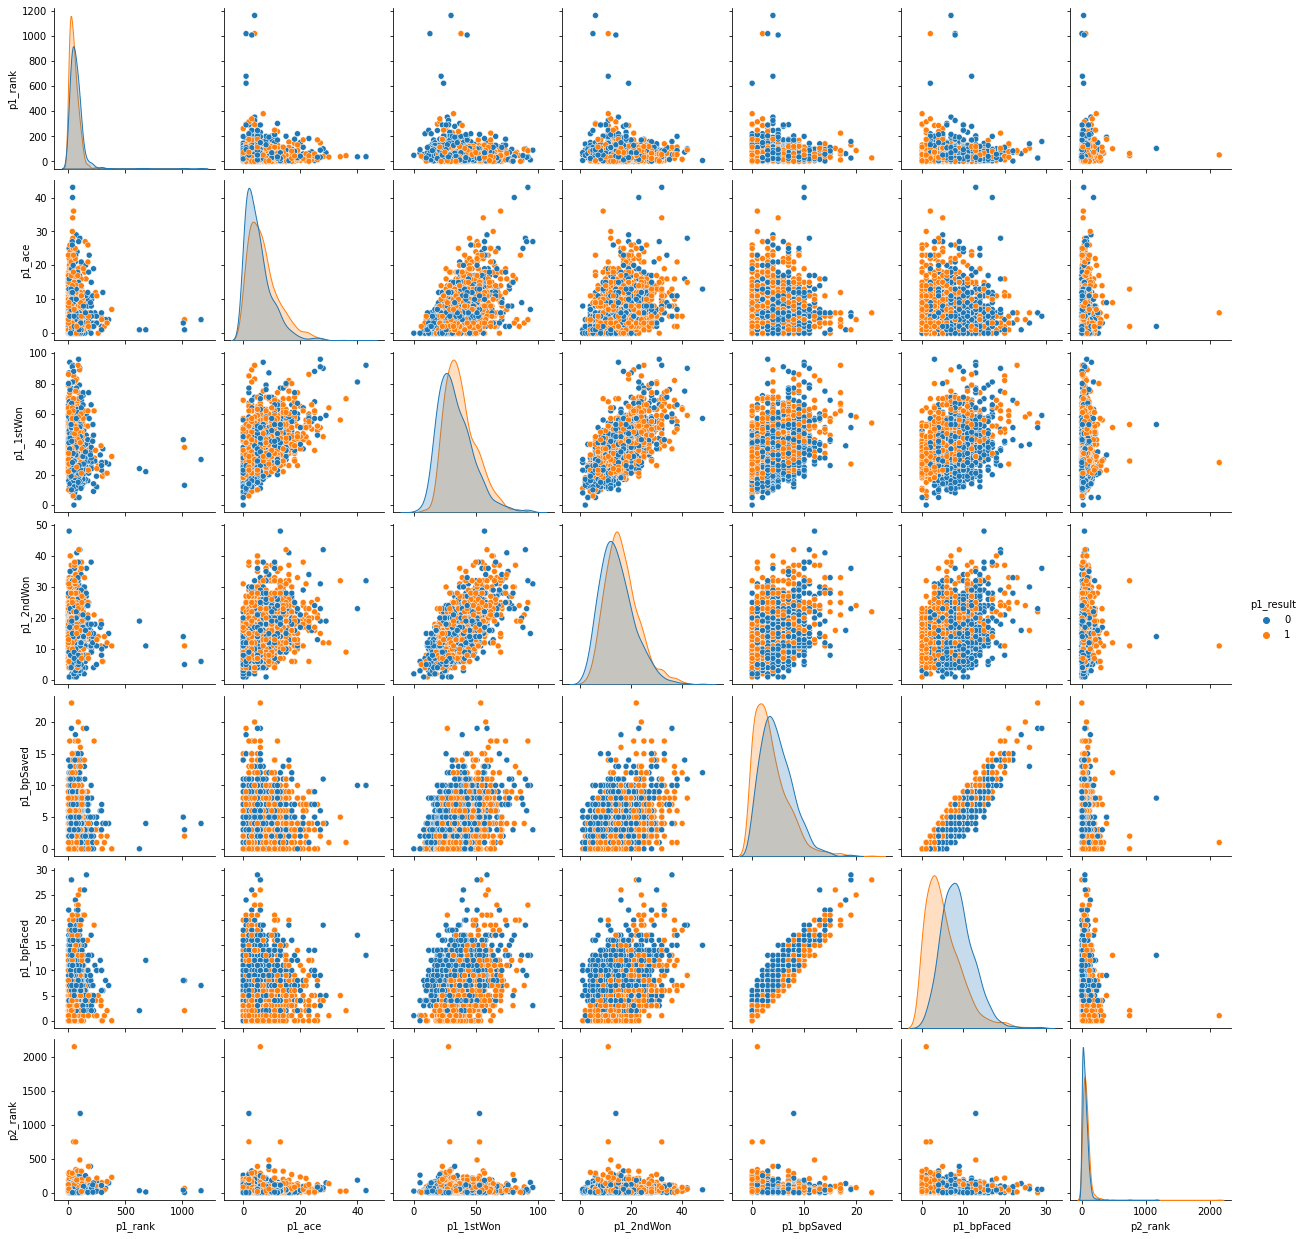

In [17]:
sns.pairplot(df[[
'p1_result',
'p1_rank','p1_ace','p1_1stWon', 'p1_2ndWon','p1_bpSaved', 'p1_bpFaced', 
'p2_rank', 
]], hue="p1_result")


In [86]:
learnloop.learn(df)

*** LogisticRegression(random_state=100) ***
Accuracy: 0.9438596491228071
Precision: 0.9330985915492958
Recall: 0.9532374100719424
predit: [1]

*** SVC(kernel='linear') ***
Accuracy: 0.9403508771929825
Precision: 0.9295774647887324
Recall: 0.9496402877697842
predit: [0]

*** KNeighborsClassifier(n_neighbors=3) ***
Accuracy: 0.6842105263157895
Precision: 0.6633333333333333
Recall: 0.7158273381294964
predit: [0]

*** DecisionTreeClassifier() ***
Accuracy: 0.743859649122807
Precision: 0.737410071942446
Recall: 0.737410071942446
predit: [1]

actuals:
     p1_hand  p1_rank  p1_ht  p1_ace  p1_svpt  p1_1stIn  ...  p2_1stIn  p2_1stWon  p2_2ndWon  p2_SvGms  p2_bpSaved  p2_bpFaced
430      1.0     83.0  196.0     7.0     87.0      41.0  ...      59.0       39.0       14.0      13.0         5.0         8.0

[1 rows x 22 columns]
p1_result    1
p2_result    0
Name: 430, dtype: int64


In [12]:
# logistic regresion individual model and predictions
# TODO: call match.build_prediction_frame()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pydotplus
from sklearn import tree

In [13]:
df = df.dropna(how='any', axis=0)
dep_vars = ['p1_result','p2_result']
results = df[dep_vars]

features = [c for c in df.columns if c not in dep_vars]

X = df[features]     # independent variables  
y = df['p1_result']  # dependant variable

X_train, X_test, y_train, y_test = train_test_split(X, df.p1_result, test_size=0.3,random_state=11) 

In [14]:
clf = LogisticRegression().fit(X_train.values, y_train.values)

yhat = clf.predict(X_test.values)

print("Accuracy:",metrics.accuracy_score(y_test, yhat)) #  Model Accuracy: how often is the classifier correct?
print("Precision:",metrics.precision_score(y_test, yhat))  # Model Precision: what percentage of positive tuples are labeled as such?
print("Recall:",metrics.recall_score(y_test, yhat)


Accuracy: 0.9456140350877194
Precision: 0.9592592592592593
Recall: 0.9283154121863799


In [15]:

ypred = clf.predict(X_test.iloc[0].values.reshape(1, -1))
print(f'predit: {ypred}')    

print('')

match_data = pd.DataFrame(X_test.iloc[0]).transpose()
print('actuals:')
print(match_data)
print(results.iloc[match_data.index.values[0]])


predit: [1]

actuals:
     p1_hand  p1_rank  p1_ht  p1_ace  p1_svpt  p1_1stIn  ...  p2_1stIn  p2_1stWon  p2_2ndWon  p2_SvGms  p2_bpSaved  p2_bpFaced
430      1.0     83.0  196.0     7.0     87.0      41.0  ...      59.0       39.0       14.0      13.0         5.0         8.0

[1 rows x 22 columns]
p1_result    1
p2_result    0
Name: 430, dtype: int64


<h1 style="color:teal">historical trends</h1>

In [78]:
# time series analysis of tennis trends Year over Year

<h1 style="color:teal">pobabilities</h1>

In [23]:
prob = Probabilities()
ra = prob.expected_rank(atp_rank=1)
rb = prob.expected_rank(atp_rank=100)
ra, rb

(8.0, 3.394829814011908)

In [24]:
pa_match = prob.prob_win_at_match_start(Ra=ra, Rb=rb)
pa_match

0.5978476967222589

In [25]:
pa_game  = prob.prob_win_game(Pa=pa_match) 
pa_game

0.7312222744755827

In [26]:
point_probs = prob.win_point(ai=0.5, bi=0.5, ci=0.5, aav=0.5, di=0.5, ei=0.5)
point_probs

(0.5, 0.5)

0.34760971265398666
[4]


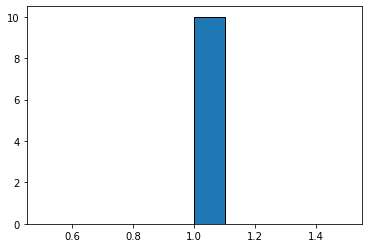

In [29]:
prob.prob_of_prop_occurance(mu=.7, k = 1, how=None)